In [3]:
from fastbook import *
from fastdownload import download_url


In [4]:
urls = search_images_ddg('bird photos', max_images = 1)
print(len(urls), urls [0])

AssertionError: 

In [ ]:
dest = Path ('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress = False)

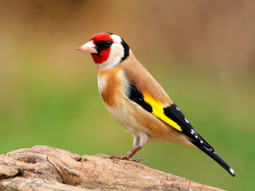

In [ ]:
im = Image.open(dest)
im.to_thumb(256,255)

In [ ]:
from pathlib import Path

searches = ['forest', 'bird']
path = Path('bird_or_not')

# Ensure the main directory exists
path.mkdir(parents=True, exist_ok=True)

if not path.exists():
    for o in searches:
        dest = (path / o) 
        dest.mkdir(parents=True, exist_ok=True)  # Create subdirectories
        results = search_images_ddg(f'{o} photo')  
        download_images(dest, urls=results[:200])


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

In [ ]:
print (path)

bird_or_not


In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter (valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms= [Resize (192, method= 'squish')]
).dataloaders(path, verbose = True)


dls.show_batch (max_n = 6 )

Found 1 items
2 datasets of sizes 1,0
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'size': (192, 192), 'method': 'squish', 'pad_mode': 'reflection', 'resamples': (<Resampling.BILINEAR: 2>, <Resampling.NEAREST: 0>), 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}


/home/gemac/Desktop/deep-learning-classification/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


ValueError: This DataLoader does not contain any batches